In [3]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 2.4 MB/s eta 0:01:02
   ---------------------------------------- 0.4/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 0.6/150.0 MB 4.5 MB/s eta 0:00:34
   ---------------------------------------- 0.9/150.0 MB 5.3 MB/s eta 0:00:29
   ---------------------------------------- 1.2/150.0 MB 5.3 MB/s eta 0:00:29
   ---------------------------------------- 1.5/150.0 MB 5.6 MB/s eta 0:00:27
   ---------------------------------------- 1.8/150.0 MB 5.5 MB/s eta 0:00:27
    --------------------------------------- 2.2/150.0 MB 5.8 MB/s eta 0:00:26
    --------------------------------------- 2.4/150.0 MB 5.9 MB/s eta 0:00:25
    ------------------

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})


from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [3]:
# read dataset using pndas function
# use parse_dates argument to change datetime dtype
Gold_dataset = pd.read_csv("gold_price_data.csv", parse_dates=["Date"])

In [5]:
# information about the dataset
Gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [6]:
# print first 5 rows in the dataframe
Gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# print last 5 rows of the dataframe
Gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,2018-05-08,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2018-05-16,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
# number of rows and columns
Gold_dataset.shape

(2290, 6)

In [4]:
# Missing Values/Null Values Count
dataset.isna().sum().sort_values(ascending=False)

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measures of the data
Gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


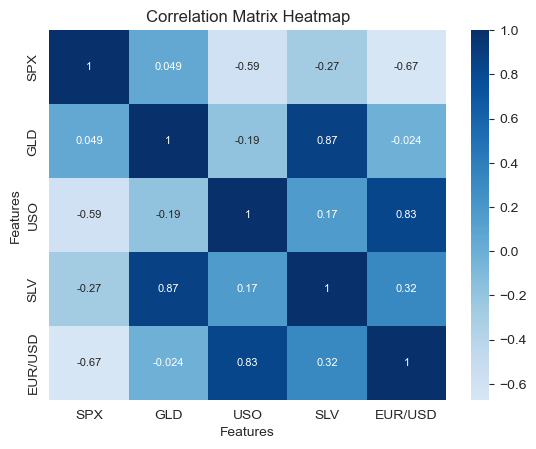

In [14]:
# Calculate correlation matrix
correlation = Gold_dataset.corr()

# Create heatmap
sns.heatmap(correlation, cbar=True, center=0, annot=True, annot_kws={'size':8}, cmap='Blues')

# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()

In [15]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

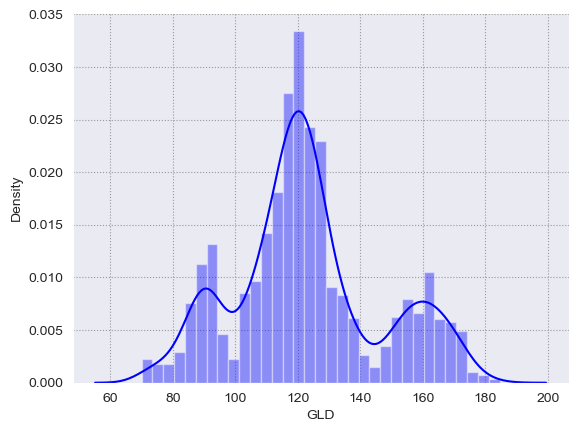

In [16]:
# checking the distribution of the GLD Price
sns.distplot(Gold_dataset['GLD'],color='blue')

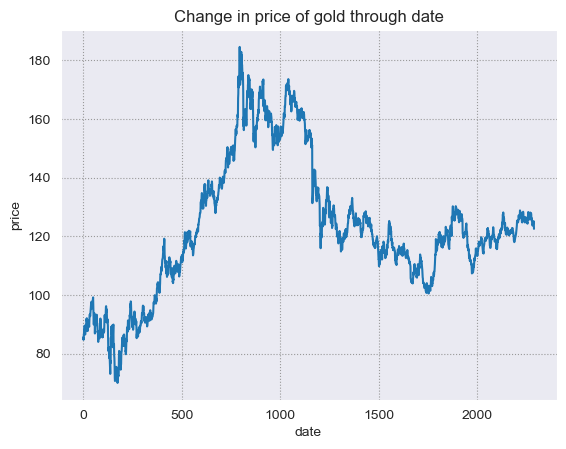

In [18]:
# plot price of gold for each increasing day
Gold_dataset["GLD"].plot()
plt.title("Change in price of gold through date")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

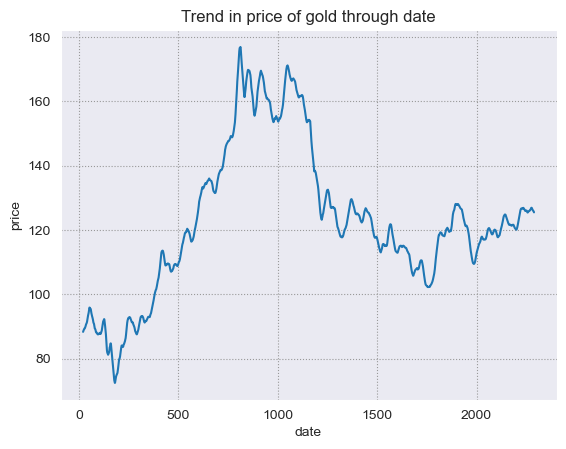

In [21]:
# apply rolling mean with window size of 3
Gold_dataset["price_trend"] = Gold_dataset["GLD"]\
	.rolling(window=20).mean()


# since we have used rolling method
# for 20 rows first 2 rows will be NAN
Gold_dataset["price_trend"].loc[20:].plot()

# set title of the chart
plt.title("Trend in price of gold through date")

# set x_label of the plot
plt.xlabel("date")
plt.ylabel("price")
plt.show()

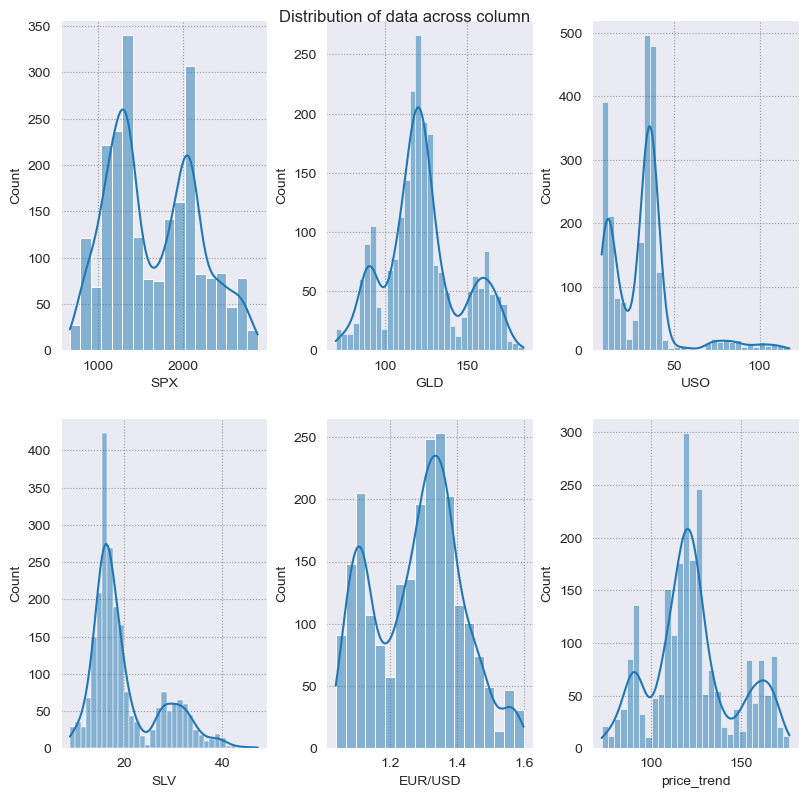

In [23]:
fig = plt.figure(figsize=(8, 8))

# suptitle of the graph
fig.suptitle('Distribution of data across column')
temp = Gold_dataset.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
	plt.subplot(2, 3, i+1)
	sns.histplot(data=Gold_dataset, x=item, kde=True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [24]:
# skewness along the index axis
print(Gold_dataset.drop("Date", axis=1).skew(axis=0, skipna=True))

SPX            0.300362
GLD            0.334138
USO            1.699331
SLV            1.153641
EUR/USD       -0.005292
price_trend    0.329895
dtype: float64
